In [40]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2017-05-31.csv')

In [42]:
df = df.iloc[33820:,:].copy()

In [43]:
df.shape

(1220774, 8)

In [44]:
df['Close'] = df['Close'].ffill()

In [45]:
df_close = pd.Series(df['Close'])

In [46]:
df_close.to_csv('close_2.csv')

In [47]:
pd.isnull(df).sum()

Timestamp                0
Open                 81473
High                 81473
Low                  81473
Close                    0
Volume_(BTC)         81473
Volume_(Currency)    81473
Weighted_Price       81473
dtype: int64

In [48]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm #, time #helper libraries
import time

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [50]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [51]:
dataframe = pd.read_csv('close_2.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [52]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [53]:
# split into train and test sets
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1

In [54]:
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
testX.shape

(122046, 30)

In [55]:
testY.shape

(122046,)

In [56]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [57]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=15, batch_size=3000, verbose=2)

Epoch 1/15
33s - loss: 0.0026
Epoch 2/15
32s - loss: 2.3748e-05
Epoch 3/15
32s - loss: 9.9568e-06
Epoch 4/15
33s - loss: 3.3580e-06
Epoch 5/15
33s - loss: 1.4088e-06
Epoch 6/15
33s - loss: 1.0547e-06
Epoch 7/15
33s - loss: 1.0109e-06
Epoch 8/15
33s - loss: 9.9962e-07
Epoch 9/15
33s - loss: 9.8986e-07
Epoch 10/15
33s - loss: 9.7740e-07
Epoch 11/15
33s - loss: 9.6318e-07
Epoch 12/15
33s - loss: 9.4683e-07
Epoch 13/15
33s - loss: 9.2835e-07
Epoch 14/15
33s - loss: 9.0796e-07
Epoch 15/15
33s - loss: 8.8510e-07


In [58]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'


In [19]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [20]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [23]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.82 RMSE
Test Score: 49.62 RMSE


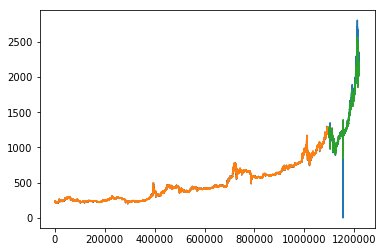

In [26]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
testPredict[-6600]

array([ 2400.85864258], dtype=float32)

In [28]:
testY[:,-6600]

array([ 2606.86003407])

In [30]:
df = pd.read_csv('close_2.csv')

In [31]:
df.iloc[-300:-200,:]

,33820,238.9
1220473,1254294,2233.00
1220474,1254295,2232.99
1220475,1254296,2233.00
1220476,1254297,2243.02
1220477,1254298,2238.09
1220478,1254299,2237.01
1220479,1254300,2238.04
1220480,1254301,2239.07
1220481,1254302,2242.98
1220482,1254303,2242.99


In [33]:
df_ = pd.read_csv('close_3.csv')

In [34]:
df_.iloc[-300:-200,:]

,620140,38.554
2131153,2751294,2209.899
2131154,2751295,2209.900
2131155,2751296,2209.900
2131156,2751297,2209.901
2131157,2751298,2209.901
2131158,2751299,2214.999
2131159,2751300,2206.530
2131160,2751301,2212.966
2131161,2751302,2205.000
2131162,2751303,2209.510


In [36]:
df.iloc[-1]

33820    1254593.0
238.9       2188.8
Name: 1220772, dtype: float64

In [37]:
df_.iloc[-1]

620140    2751593.000
38.554       2139.999
Name: 2131452, dtype: float64

In [38]:
df_ori = pd.read_csv('close.csv')

In [39]:
df_ori.iloc[-300:-200,:]

,731865,118.39
2109211,2841077,2247.48
2109212,2841078,2253.42
2109213,2841079,2259.00
2109214,2841080,2257.99
2109215,2841081,2257.00
2109216,2841082,2250.02
2109217,2841083,2254.98
2109218,2841084,2254.98
2109219,2841085,2250.02
2109220,2841086,2252.46
